## Cybersecurity: Attacks and Severity Analysis

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data from csv files
data=pd.read_csv('Cybersecurity_attacks.csv')
data_1=pd.read_csv('TCP-ports.csv')

In [3]:
#1st File
data.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


In [4]:
#2nd file
data_1.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,tcpmux,TCP Port Service Multiplexer
2,2,compressnet,Management Utility
3,3,compressnet,Compression Process
4,5,rje,Remote Job Entry


In [5]:
#Merging the 2nd dataset to get the service of ports and its relevent description.
data_1['Destination Port']=data_1['Port']
result = pd.merge(data, data_1, how='left')

In [6]:
#Final dataframe
result.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Port,Service,Description
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,80.0,http,HTTP
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,NaN,NaN,NaN
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,80.0,http,HTTP
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,5555.0,personal-agent,Personal Agent
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,80.0,http,HTTP


In [7]:
# Filling the missing values
#Where service is not available or missing, were keeeping it unknown and the same goes for description 
result['Service']=result['Service'].fillna("Unknown")
result['Description']=result['Description'].fillna("Unknown")
result['Attack Reference']=result['Attack Reference'].replace({"-":'Unknown'})

In [8]:
result.tail()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Port,Service,Description
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338,53.0,domain,Domain Name Server
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567,0.0,Unknown,Reserved
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923,110.0,pop3,Post Office Protocol - Version 3
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789,80.0,http,HTTP
178030,Reconnaissance,ICMP,unas,175.45.176.3,77929,149.171.126.19,0,IP Options: Loose Source Route (IP Option 3) (...,NaN,.,1424230421-1424230421,0.0,Unknown,Reserved


In [9]:
result['Service'].value_counts()

Unknown           97699
http              19629
domain            14118
sunrpc             9802
bgp                5566
                  ...  
infiniswitchcl        1
soundsvirtual         1
elektron-admin        1
chimera-hwm           1
opsmgr                1
Name: Service, Length: 387, dtype: int64

In [10]:
#Resolving time duration to get the exact time in seconds.
result[['Start Time','End Time']]=result['Time'].str.split('-',expand=True)
result['Start Time'] = pd.to_datetime(result['Start Time'],unit='s')
result['End Time'] = pd.to_datetime(result['End Time'],unit='s')
result['Attack duration']=((result['End Time']-result['Start Time']).dt.seconds).astype(int)
result.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Port,Service,Description,Start Time,End Time,Attack duration
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,Unknown,.,1421927414-1421927416,80.0,http,HTTP,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,NaN,Unknown,Unknown,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,80.0,http,HTTP,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,5555.0,personal-agent,Personal Agent,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,80.0,http,HTTP,2015-01-22 11:50:18,2015-01-22 11:50:18,0


In [11]:
result['Attack duration'].value_counts()

0     121909
1      30915
2       9176
3       3415
4       1550
       ...  
29        18
49        16
34        14
27        13
54         6
Name: Attack duration, Length: 61, dtype: int64

In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178031 entries, 0 to 178030
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Attack category     178031 non-null  object        
 1   Attack subcategory  173839 non-null  object        
 2   Protocol            178031 non-null  object        
 3   Source IP           178031 non-null  object        
 4   Source Port         178031 non-null  int64         
 5   Destination IP      178031 non-null  object        
 6   Destination Port    178031 non-null  int64         
 7   Attack Name         178031 non-null  object        
 8   Attack Reference    126286 non-null  object        
 9   .                   178031 non-null  object        
 10  Time                178031 non-null  object        
 11  Port                172937 non-null  float64       
 12  Service             178031 non-null  object        
 13  Description         178031 no

In [13]:
#Regex to remove the unwanted URL for Attack Name feature
import regex as re
result['Attack Name'] = result['Attack Name'].apply(lambda x: re.split('[[^()\/\/\/]*https:', str(x))[0])

In [14]:
result.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Port,Service,Description,Start Time,End Time,Attack duration
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf,Unknown,.,1421927414-1421927416,80.0,http,HTTP,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,NaN,Unknown,Unknown,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,80.0,http,HTTP,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,5555.0,personal-agent,Personal Agent,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,80.0,http,HTTP,2015-01-22 11:50:18,2015-01-22 11:50:18,0


In [15]:
# Remove unwanted coloumns
del result["."]
del result['Time']
del result['Start Time']
del result['End Time']
del result['Port']
del result['Attack Reference']

In [16]:
# Feature engineering to get the required severity based on attack duration
def severity(result):
  if result['Attack duration']>25:
    severity = 'High'
  elif result['Attack duration']>=2 and result['Attack duration']<25:
    severity = 'Medium'
  else:
    severity = 'Low'
  return severity

result['severity'] = result.apply(lambda x: severity(x), axis=1)

In [17]:
result.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Service,Description,Attack duration,severity
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf,http,HTTP,2,Medium
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability,Unknown,Unknown,0,Low
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,http,HTTP,0,Low
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup,personal-agent,Personal Agent,0,Low
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64,http,HTTP,0,Low


## Exploratory Data Analysis

### Most Frequent Types of attack in the environment

In [18]:
list(result['Attack category'].value_counts().index)

['Exploits',
 'Fuzzers ',
 'DoS',
 'Generic',
 'Reconnaissance ',
 'Fuzzers',
 'Backdoor',
 'Analysis',
 'Reconnaissance',
 ' Shellcode ',
 'Backdoors',
 'Shellcode',
 'Worms']

In [19]:
#Some data needs to be cleaned, hence going ahead to do the character resolvement.
result['Attack category']=result['Attack category'].replace({'Fuzzers ':'Fuzzers','Reconnaissance ':'Reconnaissance',' Shellcode ':'Shellcode','Backdoors':'Backdoor'})

Text(0, 0.5, 'Frequency')

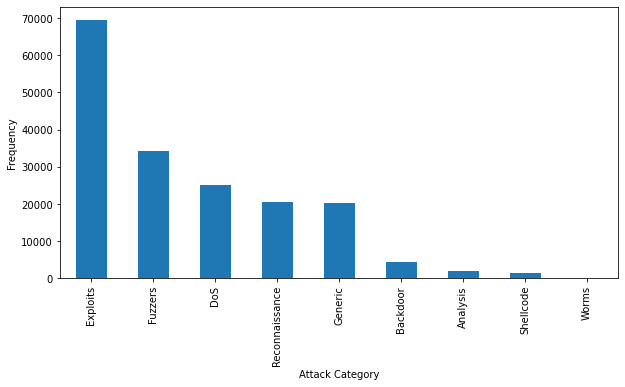

In [20]:
#Histogram to show the frequency of attacks that can happen in the environment.
result['Attack category'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('Attack Category')
plt.ylabel('Frequency')
#Exploits attacks are seen as the highest in occurence  

### Duration of attacks commuted via source

[Text(0, 0.5, 'Duration of attacks in seconds')]

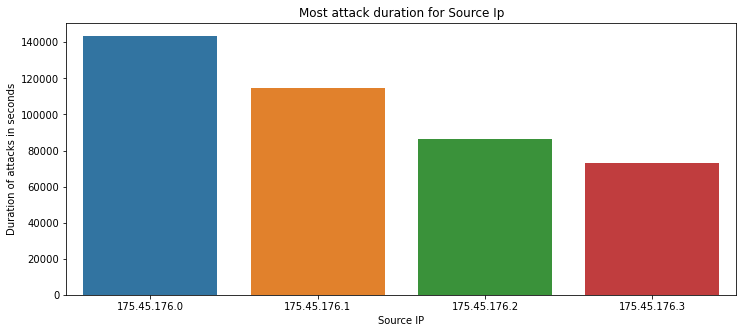

In [21]:
#The duration of attacks from source to destination Ip.
plt.figure(figsize=(12,5))
s=sns.barplot(x='Source IP', y='Attack duration', data=result.groupby('Source IP').sum().sort_values(by='Source IP',ascending=True).reset_index());
plt.title('Most attack duration for Source Ip')
s.set(ylabel='Duration of attacks in seconds')
# Source Ip: 175.45.176.40 is seen as the one with highest no of attacks origination

### No of malicious connections via Source to Destination Ip

In [22]:
df_ = result.groupby(['Source IP', 'Destination IP'])['Destination IP'].count().reset_index(name="count")

In [23]:
df_

,Source IP,Destination IP,count
0,175.45.176.0,149.171.126.10,4709
1,175.45.176.0,149.171.126.11,2667
2,175.45.176.0,149.171.126.12,4652
3,175.45.176.0,149.171.126.13,15045
4,175.45.176.0,149.171.126.14,2127
5,175.45.176.0,149.171.126.15,2189
6,175.45.176.0,149.171.126.16,2025
7,175.45.176.0,149.171.126.17,14207
8,175.45.176.0,149.171.126.18,1817
9,175.45.176.0,149.171.126.19,2054


[Text(0, 0.5, 'Count of durations(in seconds)')]

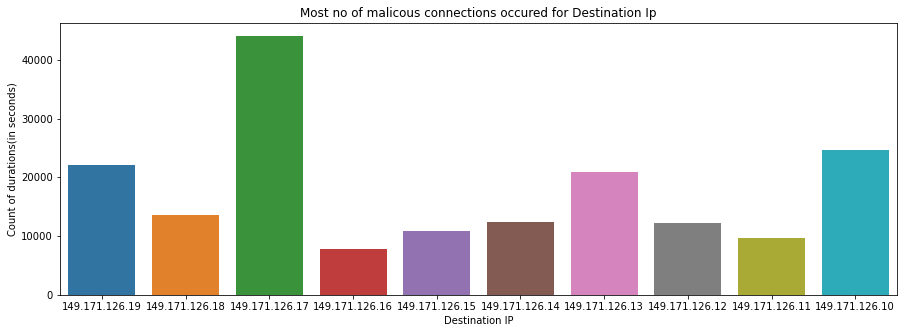

In [24]:
#To determine the no of malicious connections for destination Ip.
plt.figure(figsize=(15,5))
a=sns.barplot(x='Destination IP', y='count', data=df_.groupby('Destination IP').sum().sort_values(by='Destination IP',ascending=False).reset_index());
plt.title('Most no of malicous connections occured for Destination Ip')
a.set(ylabel='Count of durations(in seconds)')
# Destination Ip 149.171.126.17 was the one which had most no of malicious connections

### Attack severity Analysis

In [25]:
df=result.groupby(['Attack category','severity'])['severity'].count().reset_index(name="count")
df.head()

,Attack category,severity,count
0,Analysis,High,40
1,Analysis,Low,1781
2,Analysis,Medium,112
3,Backdoor,High,210
4,Backdoor,Low,4000


<AxesSubplot:ylabel='Attack category,severity'>

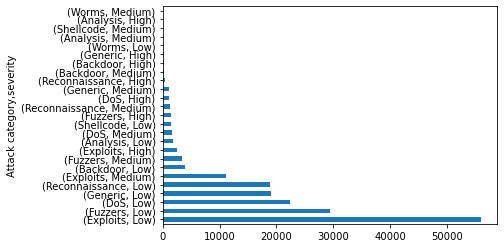

In [26]:
result[['Attack category','severity']].value_counts().plot.barh(stacked=True)

[Text(0, 0.5, 'No. of Severity')]

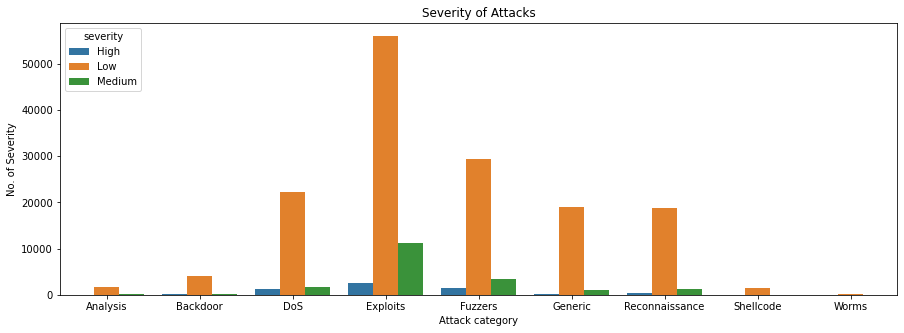

In [27]:
#Severity of attacks in the environment
plt.figure(figsize=(15,5))
b=sns.barplot(x ='Attack category', y = "count", hue = "severity", data = df)
plt.title('Severity of Attacks')
b.set(ylabel='No. of Severity')
# Exploit attacks were the one with "High" severity being the most

### Occurences for subcategory of attacks

In [28]:
df=result.groupby(['Attack category','Attack subcategory'])['severity'].count().reset_index(name="count")
df.head()

,Attack category,Attack subcategory,count
0,Analysis,HTML,383
1,Analysis,HTML,64
2,Analysis,Port Scanner,206
3,Analysis,Port Scanners,1274
4,Analysis,Spam,6


In [29]:
d=df[['count']].groupby(df['Attack subcategory']).mean().sort_values(by='count',ascending=False)#Taking mean occurence of attack
d.head()
#Miscellaneous attacks under subcategory in average occurs a lot frequently

,count
Attack subcategory,
Miscellaneous,19740.0
IXIA,16968.0
OSPF,13209.0
Browser,7059.0
BGP,5588.0


### Hypothesis testing

In [30]:
result.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Service,Description,Attack duration,severity
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf,http,HTTP,2,Medium
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability,Unknown,Unknown,0,Low
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,http,HTTP,0,Low
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup,personal-agent,Personal Agent,0,Low
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64,http,HTTP,0,Low


#### Q)- Does Attack category has any relation to Severity?
#### H0-Null hypothesis:           Attack and Severity dont have a relationship with each other
#### H1-Alternate hypothesis:  Attack and Severity has a relationship with each other

In [31]:
import scipy.stats as stats
data=pd.crosstab(result['Attack category'],result['severity'])
val1=stats.chi2_contingency(data) 
rows=len(data.iloc[0:2,0])
columns=len(data.iloc[0,0:2])
dof_1=(rows-1)*(columns-1)
print("Degree of Freedom=",dof_1)
alpha = 0.05
Observed_Values1 = data.values 
print("Observed Values :-\n",Observed_Values1)

Degree of Freedom= 1
Observed Values :-
 [[   40  1781   112]
 [  210  4000   241]
 [ 1151 22298  1668]
 [ 2468 55991 11129]
 [ 1461 29474  3426]
 [  186 19028  1082]
 [  432 18778  1361]
 [    0  1478    63]
 [    0   135    38]]


In [32]:
from scipy.stats import chi2
Expected_Values1=val1[3]
#Equate values in chi-square formulae
chi_square1=sum([(o-e)**2./e for o,e in zip(Observed_Values1,Expected_Values1)])
chi_square_statistic1=chi_square1[0]+chi_square1[1]
print("chi-square statistic:-",chi_square_statistic1)
critical_value1=chi2.ppf(q=1-alpha,df=dof_1)
print('critical_value:',critical_value1)

chi-square statistic:- 1268.8856491804568
critical_value: 3.841458820694124


In [33]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic1,df=dof_1)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof_1)

print("Test result via chi square stastic")
if chi_square_statistic1>=critical_value1:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")

print("p-value analysis on hypothesis")    
if p_value<=alpha:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Test result via chi square stastic
Reject the null hypothesis, hence relationship exists
p-value analysis on hypothesis
Reject the null hypothesis, hence relationship exists


Attacks and severity has a relationship among each other

#### Q)- Does Service has any relation to Severity?
#### H0:Null hypothesis:           Service and Severity dont have a relationship with each other
#### H1:Alternate hypothesis:  Service and Severity has a relationship with each other

In [34]:
import scipy.stats as stats
data=pd.crosstab(result['Service'],result['severity'])
val1=stats.chi2_contingency(data) 
no_of_rows=len(data.iloc[0:2,0])
no_of_columns=len(data.iloc[0,0:2])
dof_1=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom=",dof_1)
alpha = 0.01
Observed_Values1 = data.values 
print("Observed Values :-\n",Observed_Values1)

Degree of Freedom= 1
Observed Values :-
 [[ 0  1  0]
 [ 0  0  1]
 [ 0  1  0]
 ...
 [ 0  1  0]
 [ 0  6  2]
 [ 0 26  3]]


In [35]:
from scipy.stats import chi2
Expected_Values1=val1[3]
#Equate values in chi-square formulae
chi_square1=sum([(o-e)**2./e for o,e in zip(Observed_Values1,Expected_Values1)])
chi_square_statistic1=chi_square1[0]+chi_square1[1]
print("chi-square statistic:-",chi_square_statistic1)
critical_value1=chi2.ppf(q=1-alpha,df=dof_1)
print('critical_value:',critical_value1)

chi-square statistic:- 17082.251773169457
critical_value: 6.6348966010212145


In [36]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic1,df=dof_1)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof_1)

print("Test result via chi square stastic")
if chi_square_statistic1>=critical_value1:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")

print("p-value analysis on hypothesis")    
if p_value<=alpha:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")

p-value: 0.0
Significance level:  0.01
Degree of Freedom:  1
Test result via chi square stastic
Reject the null hypothesis, hence relationship exists
p-value analysis on hypothesis
Reject the null hypothesis, hence relationship exists


In [37]:
#Hence, H1 is selected, which is our alternate hypothesis
result['severity']=result['severity'].map({'Low':0,'Medium':1, 'High':2})
result['severity']=result['severity'].astype(int)

#### Q)- Does Attack duration has any relation to Severity?
#### H0:Null hypothesis:           Attack duration and Severity dont have a relationship with each other
#### H1:Alternate hypothesis:  Attack duration and Severity has a relationship with each other

In [38]:
#Using t-test
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    m1, m2 = mean(data1), mean(data2)
    s1, s2 = sem(data1), sem(data2)
    sed = sqrt(s1**2.0 + s2**2.0)
    t_stat = (m1 - m2) / sed
    df = len(data1) + len(data2) - 2
    cv = t.ppf(1.0 - alpha, df)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, df, cv, p

In [39]:
t_stat, df, cv, p = independent_ttest(result['Attack duration'],result['severity'],0.05)

In [40]:
# interpret via critical value
if abs(t_stat) >= cv:
    print('Reject the null hypothesis, hence accept alternate hypothesis.')
else:
    print('Accept null hypothesis and reject alternate one.')
# interpret via p-value
if p < alpha:
    print('Reject the null hypothesis, hence accept alternate hypothesis.')
else:
    print('Accept null hypothesis and reject alternate one.')

Reject the null hypothesis, hence accept alternate hypothesis.
Reject the null hypothesis, hence accept alternate hypothesis.


Hence, attack and severity has a relationship between each other and accoridingly to the tests conducted we can finalize our features

In [41]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178031 entries, 0 to 178030
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Attack category     178031 non-null  object
 1   Attack subcategory  173839 non-null  object
 2   Protocol            178031 non-null  object
 3   Source IP           178031 non-null  object
 4   Source Port         178031 non-null  int64 
 5   Destination IP      178031 non-null  object
 6   Destination Port    178031 non-null  int64 
 7   Attack Name         178031 non-null  object
 8   Service             178031 non-null  object
 9   Description         178031 non-null  object
 10  Attack duration     178031 non-null  int32 
 11  severity            178031 non-null  int32 
dtypes: int32(2), int64(2), object(8)
memory usage: 16.3+ MB


In [42]:
result.tail()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Service,Description,Attack duration,severity
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,domain,Domain Name Server,0,0
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,Unknown,Reserved,0,0
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3),pop3,Post Office Protocol - Version 3,2,1
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,http,HTTP,0,0
178030,Reconnaissance,ICMP,unas,175.45.176.3,77929,149.171.126.19,0,IP Options: Loose Source Route (IP Option 3),Unknown,Reserved,0,0


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr')
result['S_IP'] = LabelEncoder().fit_transform(result['Source IP'])
result['Attack_category']=LabelEncoder().fit_transform(result['Attack category'])
result['Service_1']=LabelEncoder().fit_transform(result['Service'])
X=result[['S_IP','Attack_category','Service_1']]
y=result['severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [44]:
k=model.fit(X_train,y_train)

In [45]:
from sklearn.metrics import accuracy_score
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.8577366575456785
test accuracy:  0.8620108593896274


In [46]:
import pickle
file = open('file_cyb_1.pkl','wb')
pickle.dump(k,file)

In [47]:
result.to_csv('D://601_1_prj.csv',index=False)

In [48]:
d=pd.read_csv('D://601_1_prj.csv')
d.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Service,Description,Attack duration,severity,S_IP,Attack_category,Service_1
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf,http,HTTP,2,1,0,6,136
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability,Unknown,Unknown,0,0,3,3,4
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,http,HTTP,0,0,2,3,136
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup,personal-agent,Personal Agent,0,0,2,3,255
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64,http,HTTP,0,0,2,3,136


### Model Deployment

In [49]:
#Using pywebIo to showcase model deployment
from pywebio.platform.flask import webio_view
from pywebio import STATIC_PATH
from flask import Flask, send_from_directory
from pywebio.input import *
from pywebio.output import *

import pickle
import numpy as np
import pandas as pd
model = pickle.load(open('file_cyb.pkl', 'rb')) # Load the pkl file
data=pd.read_csv('D:\\601_1_prj.csv') # Call the csv file
#Create dataframe to use the I/P features along with their particular indexes
dp=pd.DataFrame(data=data,columns=["S_IP",'Source IP','Attack category','Attack_category','Service_1','Service'])
df_2 = dp.drop_duplicates(subset=["S_IP",'Source IP'])
df_3=  dp.drop_duplicates(subset=['Attack category','Attack_category'])
df_4=  dp.drop_duplicates(subset=['Service_1','Service'])
df1=df_2.sort_values(by='Source IP', ascending=True)
df2=df_3.sort_values(by='Attack category', ascending=True)
df3=df_4.sort_values(by='Service',ascending=True)
#Calling flask to deploy
app = Flask(__name__)


def predict():
    k=select("Select Source Ip", df1['Source IP']) # Create selection parameter in the UI
    c=df1['S_IP'][df1['Source IP']==k].values[0] #returns value of the selected parameter
    l=select("Select Attack category", df2['Attack category'])
    d=df2['Attack_category'][df2['Attack category']==l].values[0]
    m=select("Select Service",df3['Service'])
    n=df3['Service_1'][df3['Service']==m].values[0]
    prediction = model.predict([[c,d,n]]) #Use the model features to predict
    output = round(prediction[0],0)
    print(prediction)
  
    put_text('Predicted Label:',output) # Returns the O/P
    if output==0:
        put_text('Predicted severity is Low')
    else:
        put_text('Predicted severity is High')
    

app.add_url_rule('/tool', 'webio_view', webio_view(predict),
                     methods=['GET', 'POST', 'OPTIONS'])
app.run(host='localhost', port=80)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:80/ (Press CTRL+C to quit)
127.0.0.1 - - [12/May/2021 18:46:24] "GET /tool HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:24] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:25] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:26] "POST /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:26] "POST /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:26] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:27] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:28] "POST /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:28] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:28] "POST /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:29] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:30] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:31] "GET /tool?app=index HT

[1]


127.0.0.1 - - [12/May/2021 18:46:35] "GET /tool HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:35] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:36] "POST /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:37] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:38] "GET /tool?app=index HTTP/1.1" 200 -
127.0.0.1 - - [12/May/2021 18:46:39] "GET /tool?app=index HTTP/1.1" 200 -
